<a href="https://colab.research.google.com/github/Said-Belhadj/TP_FCM/blob/main/FCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy C-­Means Clustering

## Imports

In [14]:
import cv2
import numpy as np
from tqdm import tqdm

#Visualisation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Implémentation de l’algorithme de Fuzzy C-means

In [17]:
import numpy as np
from tqdm import tqdm

def initialize_membership_matrix(K, c):
    U = np.random.rand(K, c)
    U /= U.sum(axis=1, keepdims=True)
    return U

def update_cluster_centers(X, U, m):
    new_cluster_center = np.dot(U.T ** m, X) / np.sum(U.T ** m, axis=1)[:, np.newaxis]
    return new_cluster_center

def calculate_distances(X, V):
    distances = np.zeros((X.shape[0], V.shape[0]))
    for i in range(X.shape[0]):
        for j in range(V.shape[0]):
            distances[i, j] = np.linalg.norm(X[i] - V[j])
    return distances

def update_membership_matrix(distances, m):
    return 1 / np.sum((distances[:, :, np.newaxis] / distances[:, np.newaxis, :])**(2 / (m - 1)), axis=-1)

def fuzzy_c_means(X, c, m, epsilon=1e-6, max_iter=50):
    K, L = X.shape

    U_old = initialize_membership_matrix(K, c)
    new_cluster_center = np.random.rand(c, L)

    iter = 0
    with tqdm(total=max_iter, desc="FCM Iterations") as pbar:
        while iter < max_iter:
            new_cluster_center = update_cluster_centers(X, U_old, m)
            distances = calculate_distances(X, new_cluster_center)

            U_new = update_membership_matrix(distances, m)

            if np.linalg.norm(U_new - U_old) < epsilon:
                break

            U_old = U_new
            iter += 1
            pbar.update(1)

    return U_new, new_cluster_center


Pour une image en couleur de forme (500, 640, 3) avec 12 centroïdes, examinons la complexité de l'algorithme FCM pour chaque itération.

La complexité dépend de plusieurs facteurs, mais principalement de la taille de l'image (le nombre de pixels) et du nombre de clusters. Voici comment les termes de complexité se manifestent dans votre cas :

1. **Calcul des distances :** $ (O(K \cdot L \cdot c)) $, où $(K)$ est le nombre de pixels dans l'image (500 * 640 dans votre cas), $(L)$ est la dimensionnalité des données (3 pour une image RGB) et (c) est le nombre de clusters (12 dans votre cas).
   
   Donc, pour votre image, la complexité serait de l'ordre de $(O(500 \cdot 640 \cdot 3 \cdot 12))$.

2. **Mise à jour de la matrice d'appartenance $(U)$ :** $ (O(K \cdot c))$, où $(K)$ est le nombre de pixels dans l'image et $(c)$ est le nombre de clusters. Dans votre cas, cela serait de l'ordre de $(O(500 \cdot 640 \cdot 12))$.

3. **Mise à jour des centres de cluster $(V)$ :** $(O(K \cdot L \cdot c))$, où $(K)$ est le nombre de pixels dans l'image, $(L)$ est la dimensionnalité des données (3 pour une image RGB), et $(c)$ est le nombre de clusters. Pour votre image, cela serait de l'ordre de $(O(500 \cdot 640 \cdot 3 \cdot 12))$.

La complexité totale par itération serait la somme de ces termes, mais il est important de noter que le nombre d'itérations $(I)$ détermine finalement la complexité totale de l'algorithme.

Dans le cas idéal, si l'algorithme converge rapidement (un petit nombre d'itérations), la complexité totale serait proportionnelle au produit de la complexité par itération et du nombre d'itérations $(I)$. En p


## Application de l'algorithme Fuzzy C Means à la segmentation d’une image en régions floues

In [69]:
# Charger une image en RGB
image = cv2.imread('/content/drive/MyDrive/fuzzy/palette_de_couleur.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Aplatir l'image pour obtenir une liste de valeurs de pixels
data = image_rgb.reshape(-1, 3).astype(np.float32) / 255.0  # Normalisation

# Paramètres de l'algorithme FCM
num_clusters = 13
m = 2.0

In [70]:
# Appliquer la fonction FCM
membership, centroids = fuzzy_c_means(data, num_clusters, m, max_iter=20)
print(membership)
print(centroids)

# Obtenir les étiquettes de clustering
labels = np.argmax(membership, axis=1)

# Redimensionner les étiquettes pour les remettre dans la forme de l'image
segmentation_result = labels.reshape(image.shape[0], image.shape[1])

FCM Iterations: 100%|██████████| 20/20 [05:56<00:00, 17.85s/it]

[[3.59191022e-09 4.13946582e-09 4.27980454e-09 ... 4.43799938e-09
  9.99999852e-01 3.74550567e-09]
 [3.59191022e-09 4.13946582e-09 4.27980454e-09 ... 4.43799938e-09
  9.99999852e-01 3.74550567e-09]
 [3.59191022e-09 4.13946582e-09 4.27980454e-09 ... 4.43799938e-09
  9.99999852e-01 3.74550567e-09]
 ...
 [3.59191022e-09 4.13946582e-09 4.27980454e-09 ... 4.43799938e-09
  9.99999852e-01 3.74550567e-09]
 [3.59191022e-09 4.13946582e-09 4.27980454e-09 ... 4.43799938e-09
  9.99999852e-01 3.74550567e-09]
 [3.59191022e-09 4.13946582e-09 4.27980454e-09 ... 4.43799938e-09
  9.99999852e-01 3.74550567e-09]]
[[0.00216792 0.4398855  0.7365995 ]
 [0.39866106 0.17809484 0.56849187]
 [0.9419904  0.34982374 0.14355888]
 [0.95126387 0.89308475 0.7454629 ]
 [0.18560852 0.19322656 0.56704601]
 [0.16393662 0.66980373 0.88806588]
 [0.98737344 0.92931827 0.13353884]
 [0.55042099 0.77596972 0.24731105]
 [0.83344186 0.1386635  0.16786658]
 [0.95898275 0.64013641 0.11797286]
 [0.13242752 0.70775121 0.45213574]
 [0.

## Visualisation des régions floues

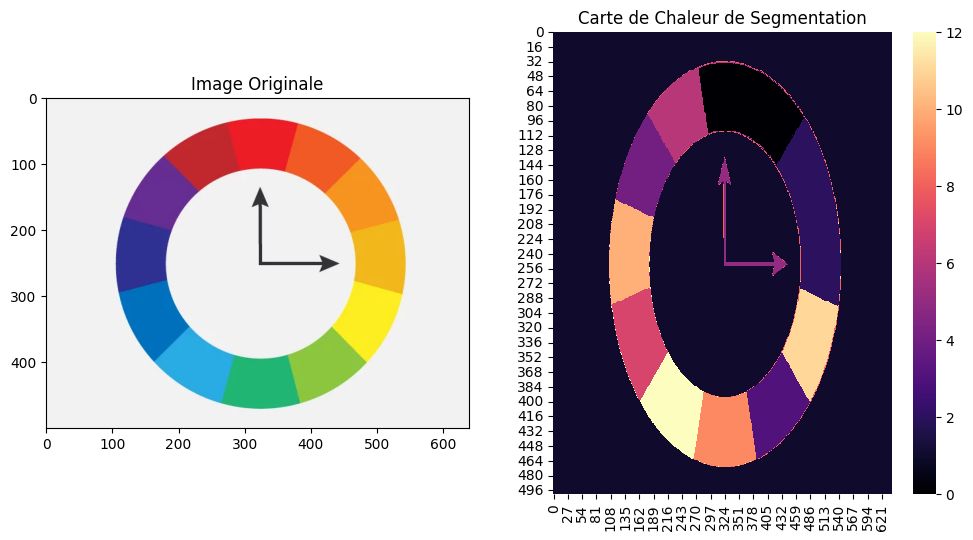

In [ ]:

# Afficher l'image originale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image Originale')

# Afficher la carte de chaleur de la segmentation
plt.subplot(1, 2, 2)
sns.heatmap(segmentation_result, cmap='magma', cbar=True)
plt.title('Carte de Chaleur de Segmentation')
plt.show()


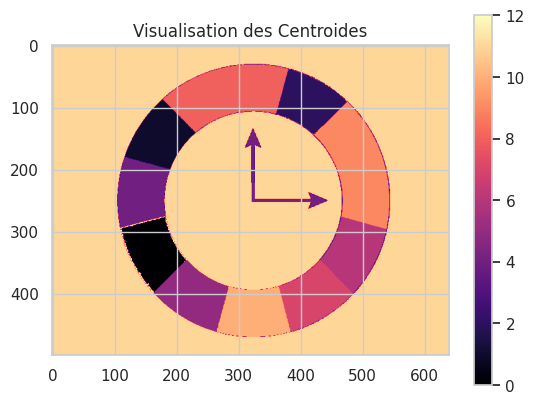

In [71]:
cmap = ListedColormap(centroids)

# Affichage l'image avec les couleurs des clusters
plt.imshow(segmentation_result, cmap='magma')
plt.colorbar()
plt.title('Visualisation des Centroides')
plt.show()


In [74]:
# Afficher l'image originale
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(image_rgb)

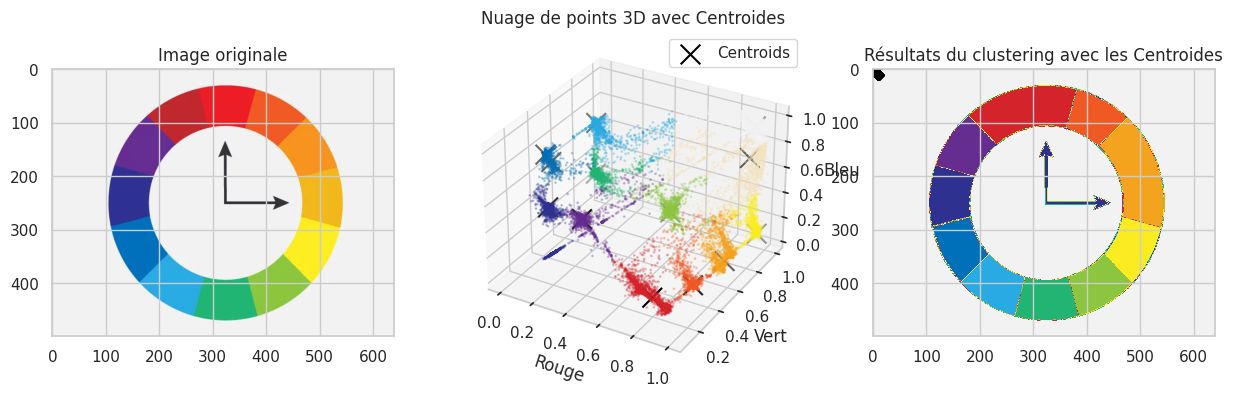

In [75]:
fig = plt.figure(figsize=(15, 6))


ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image_rgb)
ax1.set_title('Image originale')

# Création d'une palette de couleurs basée sur les centroides
cmap = ListedColormap(centroids)

# Affichage des résultats du clustering avec les centroides en nuage de points 3D
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
scatter = ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap=cmap, s=1, alpha=0.25)
ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', marker='x', s=200, label='Centroids')
ax2.set_title('Nuage de points 3D avec Centroides')
ax2.set_xlabel('Rouge')
ax2.set_ylabel('Vert')
ax2.set_zlabel('Bleu')
ax2.legend()

# Affichage des résultats du clustering sur l'image avec les centroides
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(segmentation_result, cmap=cmap)
ax3.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids', alpha=1)
ax3.set_title('Résultats du clustering avec les Centroides')

plt.show()


La visualisation en 3D: chaque axe **(x, y, z)** de l'espace 3D représente l'intensité des canaux **Rouge**, **Vert** et **Bleu**, respectivement. Ainsi, un point dans cet espace représente la couleur d'un **pixel** de l'image.

Ici, dans un contexte de **clustering flou/fuzzy**, les points sont colorés en fonction du cluster auquel ils appartiennent. Les centroides des clusters sont également représentés dans cet espace en tant que points distincts, généralement marqués d'une **croix ('x')**. Les croix sont assez difficiles à percevoir dans la visualisation que j'ai réalisée, mais on peut les constater au niveau des pixels jaunes, violets et rouge.

Cette visualisation permet de voir la répartition des couleurs dans l'image en fonction des clusters déterminés par l'algorithme de clustering **Fuzzy C Means**, et elle offre une perspective sur la séparation des différentes **teintes** présentes dans l'image. Elle peut aider à identifier visuellement les différents centroids des clusters, ici

FCM Iterations: 100%|██████████| 8/8 [01:51<00:00, 13.95s/it]


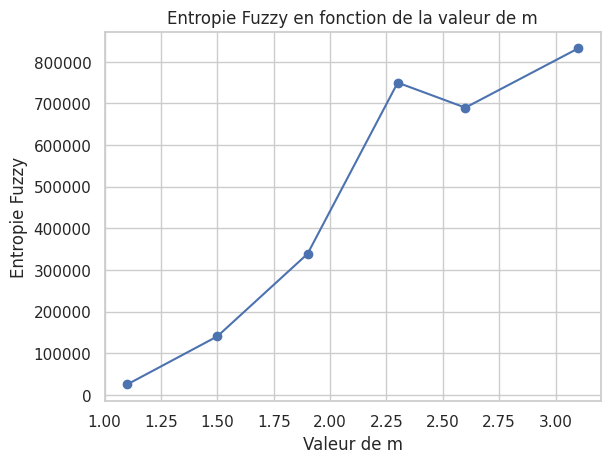

In [81]:
def fuzzy_entropy(U):
    return -np.sum(U * np.log(U + 1e-10))

X = data

# Liste des valeurs de m à tester
m_values = np.array([1.1, 1.5, 1.9, 2.3, 2.6, 3.1])

entropies = []

for m in m_values:
    U, V = fuzzy_c_means(X, c=3, m=m, max_iter=8)

    entropy = fuzzy_entropy(U)
    entropies.append(entropy)

# Affichage des résultats dans un graphe
plt.plot(m_values, entropies, marker='o')
plt.title("Entropie Fuzzy en fonction de la valeur de m")
plt.xlabel("Valeur de m")
plt.ylabel("Entropie Fuzzy")
plt.grid(True)
plt.show()

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

def visualize_3d_clustering(image_rgb, data, labels, centroids, segmentation_result):
    fig = plt.figure(figsize=(15, 6))

    # Afficher l'image originale
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.imshow(image_rgb)
    ax1.set_title('Image originale')

    # Création d'une palette de couleurs basée sur les centroides
    cmap = ListedColormap(centroids)

    # Affichage des résultats du clustering avec les centroides en nuage de points 3D
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    scatter = ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap=cmap, s=1, alpha=0.05)
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', marker='x', s=200, label='Centroids')
    ax2.set_title('Nuage de points 3D avec Centroides')
    ax2.set_xlabel('Rouge')
    ax2.set_ylabel('Vert')
    ax2.set_zlabel('Bleu')
    ax2.legend()

    # Affichage des résultats du clustering sur l'image avec les centroides
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.imshow(segmentation_result, cmap=cmap)
    ax3.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids', alpha=1)
    ax3.set_title('Résultats du clustering avec les Centroides')

    plt.show()

# Example usage:
# visualize_3d_clustering(image_rgb, data, labels, centroids, segmentation_result)


In [78]:
# Charger une image en RGB
image = cv2.imread('/content/drive/MyDrive/fuzzy/milky-way.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Aplatir l'image pour obtenir une liste de valeurs de pixels
data = image_rgb.reshape(-1, 3).astype(np.float32) / 255.0  # Normalisation

# Paramètres de l'algorithme FCM
num_clusters = 7
m = 2.0

# Appliquer la fonction FCM
membership, centroids = fuzzy_c_means(data, num_clusters, m, max_iter=10)
print(membership)
print(centroids)

# Obtenir les étiquettes de clustering
labels = np.argmax(membership, axis=1)

# Redimensionner les étiquettes pour les remettre dans la forme de l'image
segmentation_result = labels.reshape(image.shape[0], image.shape[1])

FCM Iterations: 100%|██████████| 10/10 [05:17<00:00, 31.74s/it]

[[9.18202644e-01 6.28503222e-02 4.05926959e-03 ... 1.94692489e-03
  9.44805203e-04 1.12011486e-02]
 [8.60535729e-01 1.02705137e-01 8.03879323e-03 ... 3.93863904e-03
  1.93970905e-03 2.12055070e-02]
 [9.76056158e-01 1.96572554e-02 8.84780445e-04 ... 4.09978972e-04
  1.94375001e-04 2.63463300e-03]
 ...
 [9.05189881e-01 7.23865631e-02 4.81456365e-03 ... 2.32154855e-03
  1.12901327e-03 1.32088971e-02]
 [8.79218049e-01 9.03055077e-02 6.61184122e-03 ... 3.22229695e-03
  1.57872991e-03 1.77339320e-02]
 [8.52236672e-01 1.08228065e-01 8.66023210e-03 ... 4.26443300e-03
  2.10454613e-03 2.27310780e-02]]
[[0.04929251 0.06426605 0.09487453]
 [0.08955897 0.10484736 0.14085506]
 [0.25392479 0.25615049 0.31579954]
 [0.57664046 0.5179091  0.55723201]
 [0.36748787 0.34763215 0.40235242]
 [0.53251393 0.47870381 0.51757361]
 [0.16514671 0.17542265 0.22364756]]


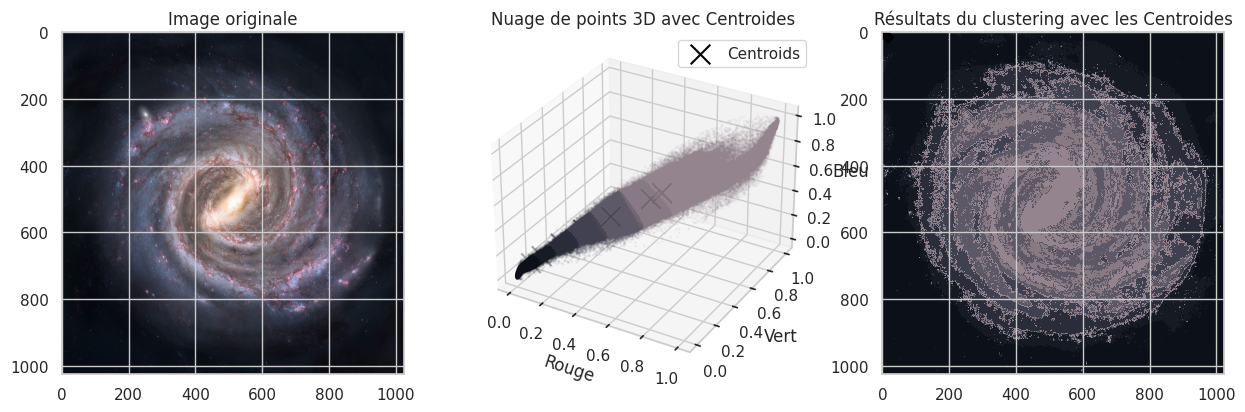

In [79]:
visualize_3d_clustering(image_rgb, data, labels, centroids, segmentation_result)

In [82]:
entropies

[25363.68284590808,
 140864.3994738211,
 338902.2441784263,
 750045.4420200539,
 689962.5728388513,
 832123.2489370853]